In [87]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import matplotlib.animation as animation
from tqdm import tqdm


In [88]:
# Constants
LASER_ANGLE_RANGE = 125 # to the left and the right(in degrees)
NUMBER_OF_LASER_RAYS = 2 * LASER_ANGLE_RANGE // 2 # 2 degrees per ray
LASER_MAX_RANGE = 1200//4 # (in pixels)
PIXEL_WIDTH = 4
PIXEL_HIGHT = 4
MAP_SIZE = (400, 680) # where the first dimension if for the y-axis and the second dimension (in pixels)

In [89]:
# Read Data
def getInitialMap():
    # Read Map.jpg using skimage
    map = io.imread('Map.jpg')
    # Convert to grayscale
    map = np.mean(map, axis=2)
    # Apply threshold
    map = map < 128
    # Convert to 8-bit integer
    map = map * 255
    return map
def getBinaryInitialMap():
    # Read Map.jpg using skimage
    map = io.imread('Map.jpg')
    # Convert to grayscale
    map = np.mean(map, axis=2)
    # Convert to binary
    map = map < 128
    # convert it to zeros and ones
    map = map * 1
    return map
def getInitialRobotPose():
    robotPose = np.array([20, 20, 0]) # x-coordinates, y-coordinates, angle with the x-axis in degree
    return robotPose


In [90]:
# Drawing Functions
def drawRobot(map, robotPose):
    mapY, mapX, _ = robotPose
    if (mapX >= 0 and mapX < map.shape[0] and mapY >= 0 and mapY < map.shape[1]):
        map[mapX, mapY] = 200
    return map
def drawLaserLines(map, robotPose):
    robotX, robotY, robotTheta = robotPose 
    for theta in range(robotTheta - LASER_ANGLE_RANGE, robotTheta + LASER_ANGLE_RANGE, 2):
        # laser range
        r = LASER_MAX_RANGE
        # laser step
        dr = 1
        for d in range(0, r, dr):
            # update the laser end point
            mapY = int(robotX + d * np.cos(theta * np.pi / 180) )
            mapX = int(robotY + d * np.sin(theta * np.pi / 180) )
            # if the laser is inside the map
            if (mapX >= 0 and mapX < map.shape[0] and mapY >= 0 and mapY < map.shape[1]):
                # Check if the laser hits an obstacle
                if (map[mapX, mapY] == 255): # revered as the origin is in the lower left corner
                    d = r # no need to check further points
                    break
                else:
                    map[mapX, mapY] = 100  # color the laser 
    return map


In [91]:
# Display Functions
def getFigure():
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.clear()  # Clears the figure to update the line, point, title, and axes
    # Adding Figure Labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return fig, ax
def showStaticMap(map, robotPose):
    map = drawRobot(drawLaserLines(map, robotPose), robotPose)
    fig, ax = getFigure()
    # Plot the robot
    plt.scatter(robotPose[0], robotPose[1], color='r')
    ax.set_title("Robot Pose: (%2d, %2d, %2d)" % (robotPose[0], robotPose[1], robotPose[2]))
    plt.imshow(map)
    plt.show()
def showAnimatedMap(robotPose):
    def animate(i):
        newRobotPose = robotPose.copy()
        newRobotPose[0] += i
        map = drawRobot(drawLaserLines(getInitialMap(), newRobotPose), newRobotPose)
        # map = drawRobot(map, robotPose)
        ax.clear() 
        plt.scatter(newRobotPose[0], newRobotPose[1], color='r')
        ax.set_title("Robot Pose: (%2d, %2d, %2d)" % (newRobotPose[0], newRobotPose[1], newRobotPose[2]))
        plt.imshow(map)
    # initialize the figure
    fig, ax = getFigure()
    # animation
    anim = animation.FuncAnimation(fig, animate, init_func=getInitialMap,
                               frames=MAP_SIZE[1], interval=1, blit=True,)
    plt.show()
    anim.save('map.gif', dpi=80, writer='pillow')


# Get the laser beams based on the robot pose in the map

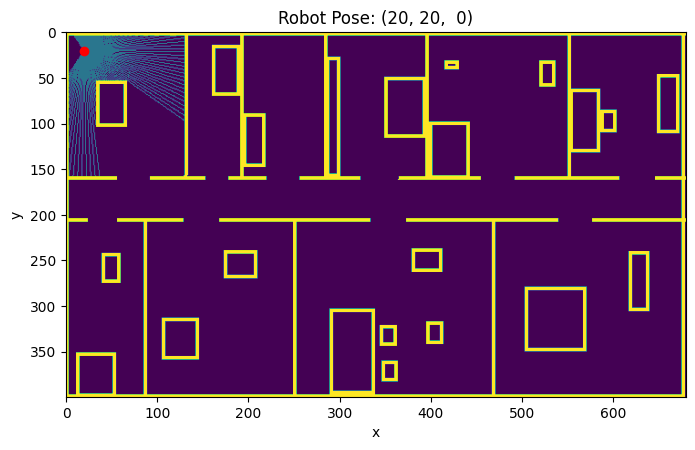

In [92]:
showStaticMap(getInitialMap(), getInitialRobotPose())

In [93]:
# showAnimatedMap(getInitialRobotPose())
# ![SegmentLocal](map.gif "map")


In [94]:
# Get rays from pose
def getRays(map, robotPose):
    laserRays = [LASER_MAX_RANGE]* NUMBER_OF_LASER_RAYS  # the default is the max range of rays
    laserPoints = {}
    robotX, robotY, robotTheta = robotPose 
    for rayIdx, theta in enumerate(range(robotTheta - LASER_ANGLE_RANGE, robotTheta + LASER_ANGLE_RANGE, 2)):
        # laser range, laser step
        r, dr = LASER_MAX_RANGE, 1
        for d in range(0, r, dr):
            # update the laser end point
            mapY = int(robotX + d * np.cos(theta * np.pi / 180))
            mapX = int(robotY + d * np.sin(theta * np.pi / 180))
            # if the laser is inside the map
            if (mapX >= 0 and mapX < map.shape[0] and mapY >= 0 and mapY < map.shape[1]):
                laserPoints[(robotX, robotY, theta)] = (mapX, mapY)
                # Check if the laser hits an obstacle
                if (map[mapX, mapY] == 255): # revered as the origin is in the lower left corner
                    laserRays[rayIdx] = d
                    d = r # no need to check further points
                    break
                else:
                    map[mapX, mapY] = 100  # color the laser 
    return laserRays, laserPoints
rays, points = getRays(getInitialMap(), getInitialRobotPose())
print(rays)
# print(points)

[20, 20, 19, 19, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 24, 25, 26, 27, 28, 30, 32, 34, 36, 38, 41, 45, 50, 55, 62, 72, 84, 103, 111, 111, 111, 111, 111, 111, 111, 111, 112, 113, 113, 114, 116, 117, 118, 120, 122, 124, 126, 129, 132, 135, 55, 53, 51, 49, 47, 46, 44, 43, 42, 41, 40, 39, 38, 38, 37, 36, 37, 40, 45, 51, 58, 69, 84, 140, 139, 139, 139, 139, 139, 139, 140, 109, 90, 76, 66, 59, 53, 48, 44, 41, 38, 36, 34, 32]


In [95]:
# allPoints = {}
# map = getInitialMap()
# for x in tqdm(range(map.shape[0]//20)):
#     for y in range(map.shape[1]//20):
#         for theta in range(0, 360, 180):
#             _, points = getRays(getInitialMap(), (x, y, theta))
#             allPoints= dict(points)
# print(len(allPoints))
# print(allPoints)

# # Get the likelihood from the rays
# def getLikelihoodFromRays(map, rays):
#     def getEndPoint(rayStart, rayLength, theta):
#         r, dr = rayLength, 1
#         for d in range(0, r, dr):
#             # update the laser end point
#             mapY = int(rayStart[0] + d * np.cos(theta * np.pi / 180))
#             mapX = int(rayStart[1] + d * np.sin(theta * np.pi / 180))
#             # if the laser is inside the map
#             if (mapX >= 0 and mapX < map.shape[0] and mapY >= 0 and mapY < map.shape[1]):
#                 # Check if the laser hits an obstacle
#                 if (map[mapX, mapY] == 255): # revered as the origin is in the lower left corner
#                     return mapX, mapY
#         # Return max range if no obstacle is found
#         mapY = int(rayStart[0] + r * np.cos(theta * np.pi / 180))
#         mapX = int(rayStart[1] + r * np.sin(theta * np.pi / 180))
#         return mapX, mapY

#     likelihood = np.ones(map.shape)
#     # iterate over the rays
#     for ray in tqdm(rays):
#         # iterate over the map 
#         for x in tqdm(range(map.shape[0])):
#             for y in tqdm(range(map.shape[1])):
#                 # iterate over all the possible angles 
#                 for theta in range(0, 360):
#                     endPoint = getEndPoint((x, y), rays[ray], theta)
#                     if (endPoint[0] >= 0 and endPoint[0] < map.shape[0] and endPoint[1] >= 0 and endPoint[1] < map.shape[1]):
#                         likelihood[endPoint[0], endPoint[1]]*=0.9      
#     return likelihood
# likelihood = getLikelihoodFromRays(getInitialMap(), rays)
# print(likelihood)

# plt.imshow(likelihood)
# plt.show()

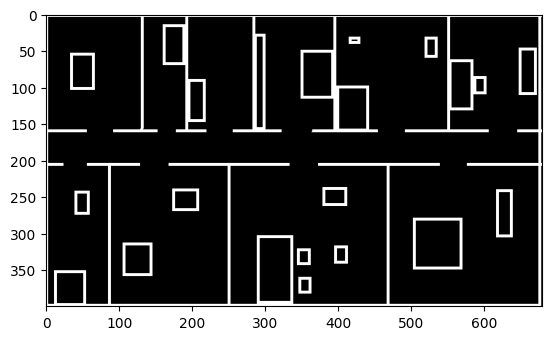

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]]


In [98]:
plt.imshow(getBinaryInitialMap(), cmap='gray')
plt.show()
print(getBinaryInitialMap())

In [99]:
# def getEndPointProbability(rays, pointX, pointY, theta):
#     probability = 1 # initialize the probability
#     for rayIdx, theta in enumerate(range(-125, 125, 2)):  
#         r, dr = rays[rayIdx], 1
#         hit = False
#         mapY = 0
#         mapX = 0
#         # Check if the laser hits an obstacle
#         for d in range(0, r, dr): # should be incremental to avoid obstacles
#             # update the laser end point
#             mapY = int(pointX + d * np.cos(theta * np.pi / 180))
#             mapX = int(pointY + d * np.sin(theta * np.pi / 180))
#             # if the laser is inside the map
#             if (mapX >= 0 and mapX < map.shape[0] and mapY >= 0 and mapY < map.shape[1]):
#                 # Check if the laser hits an obstacle
#                 if (map[mapX, mapY] == 255): # if the laser hits an obstacle
#                     d = r # no need to check further points
#                     hit = True 
#                     break
#             else: # if the laser is outside the map
#                 probability*=0.1      
            
#         if not hit:
#             if (mapX >= 0 and mapX < map.shape[0] and mapY >= 0 and mapY < map.shape[1]):            
#                     probability*= map[mapX, mapY]
#     return probability
def getEndPointProbability(likelihood, rays, pointX, pointY, theta):
    probability = 1 # initialize the probability
    for rayIdx, theta in enumerate(range(-125, 125, 2)):  
        # update the laser end point
        mapY = int(pointX + rays[rayIdx] * np.cos(theta * np.pi / 180))
        mapX = int(pointY + rays[rayIdx] * np.sin(theta * np.pi / 180))
        # if the laser is inside the map
        if (mapX >= 0 and mapX < likelihood.shape[0] and mapY >= 0 and mapY < likelihood.shape[1]):
                probability*= likelihood[mapX, mapY]
        else: # if the laser is outside the map
            probability=0.1      
    return probability
                
def getLikelihood(map, rays):
    for x in tqdm(range(map.shape[0])):
        for y in range(map.shape[1]):
            for theta in range(0, 360, 30):
                map[x, y] = max(getEndPointProbability(map, rays, x, y, theta), map[x, y])
    map = map/np.max(map) # normalize the likelihood
    return map
likelihood = getLikelihood(getBinaryInitialMap(), rays)

100%|██████████| 400/400 [11:55<00:00,  1.79s/it]


In [117]:
likelihood = 1 - likelihood # reverse the map
print(likelihood)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


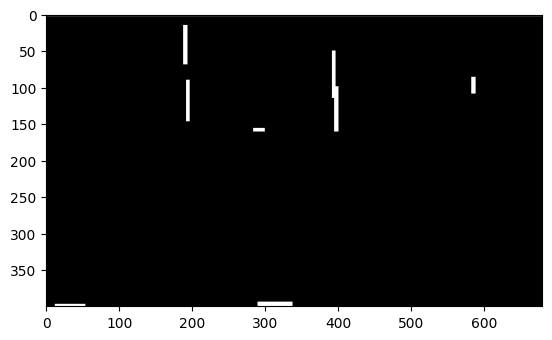

In [118]:

# dilate the map with a 3x3 kernel using skimage
from skimage.morphology import dilation
kernel = np.ones((3,3),np.uint8)
likelihood = dilation(likelihood, kernel)
plt.imshow(likelihood, cmap='gray')
plt.show()